In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
df= pd.read_csv("Irish-hsa-incidents-2017-2021.csv")

In [3]:
df.head()

,Age,Gender,NACE Sector,Incident Type,Employment Status,Year,County,Trigger
0,0-17 Years,Male,F - CONSTRUCTION,Non-fatal injury,Employee,2017,Carlow,"Lifting, carrying"
1,0-17 Years,Female,C - MANUFACTURING,Non-fatal injury,Employee,2017,Dublin,Other triggers not listed
2,0-17 Years,Female,Q - HUMAN HEALTH AND SOCIAL WORK ACTIVITIES,Non-fatal injury,Employee,2017,Dublin,"Fall on same level (slip, stumble etc)"
3,0-17 Years,Male,C - MANUFACTURING,Non-fatal injury,Employee,2017,Offaly,"Pushing, pulling"
4,0-17 Years,Male,I - ACCOMMODATION AND FOOD SERVICE ACTIVITIES,Non-fatal injury,Employee,2017,Dublin,Loss of control of machine


In [4]:
df.shape

(45897, 8)

In [5]:
df = df[df['NACE Sector'] == 'F - CONSTRUCTION']

In [6]:
df.head()

,Age,Gender,NACE Sector,Incident Type,Employment Status,Year,County,Trigger
0,0-17 Years,Male,F - CONSTRUCTION,Non-fatal injury,Employee,2017,Carlow,"Lifting, carrying"
6,0-17 Years,Male,F - CONSTRUCTION,Non-fatal injury,Employee,2017,Dublin,Fall from height
19,0-17 Years,Male,F - CONSTRUCTION,Non-fatal injury,Employee,2019,Monaghan,Other triggers not listed
26,0-17 Years,Male,F - CONSTRUCTION,Non-fatal injury,Employee,2019,Dublin,"Lifting, carrying"
27,0-17 Years,Male,F - CONSTRUCTION,Non-fatal injury,Employee,2019,Waterford,Loss of control of machine


In [7]:
df.shape

(4371, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4371 entries, 0 to 45896
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  4341 non-null   object
 1   Gender               4341 non-null   object
 2   NACE Sector          4371 non-null   object
 3   Incident Type        4371 non-null   object
 4   Employment Status    4341 non-null   object
 5   Year                 4371 non-null   int64 
 6   County               4369 non-null   object
 7   Trigger              4341 non-null   object
dtypes: int64(1), object(7)
memory usage: 307.3+ KB


In [9]:
df["Age"].unique()

array(['0-17 Years', '18-24 years', '25-34 years', '35-44 years',
       '45-54 years', '55-64 years', '65-99 years', 'Age unknown', nan],
      dtype=object)

In [10]:
df["NACE Sector"].unique()

array(['F - CONSTRUCTION'], dtype=object)

In [11]:
df["Incident Type"].unique()

array(['Non-fatal injury', 'Fatality', 'Non-work related',
       'Dangerous Occurrence'], dtype=object)

In [12]:
df["County"].unique()

array(['Carlow', 'Dublin', 'Monaghan', 'Waterford', 'Sligo', 'Cork',
       'Donegal', 'Kildare', 'Laois', 'Mayo', 'Meath', 'Limerick',
       'Louth', 'Galway', 'Clare', 'Cavan', 'Kerry', 'Westmeath',
       'Wexford', 'Offaly', 'Kilkenny', 'Wicklow', 'Tipperary', 'Leitrim',
       'Roscommon', 'Longford', nan], dtype=object)

In [13]:
df["Trigger"].unique()

array(['Lifting, carrying', 'Fall from height',
       'Other triggers not listed', 'Loss of control of machine',
       'Fall on same level (slip, stumble etc)',
       'Loss of control of hand held tool', 'Pushing, pulling',
       'Other fall-related accident trigger',
       'Loss of control of means of transport or handling equipment',
       'Twisting, turning', 'Loss of control of object being worked on',
       'Person in inappropriate area', 'Breakage of material at joints',
       'Body movement (no physical stress)',
       'Overflow, leakage, emission of smoke/dust',
       'Overflow, leakage, emission of solid material',
       'Overflow, leakage, emission of liquid',
       'Other breakage/collapse related trigger', 'Explosion',
       'Shock, fright', 'Accident trigger unknown',
       'Electrical problem - indirect contact', 'Fire, flare up',
       'Other loss of control trigger',
       'Fall, collapse of material - on same level',
       'Overflow, leakage, emission 

In [14]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys = ['count', 'percentage'])
print('Count and Percentage of missing values for the columns: ')
missing_data

Count and Percentage of missing values for the columns: 


,count,percentage
Age,30,0.686342
Gender,30,0.686342
Employment Status,30,0.686342
Trigger,30,0.686342
County,2,0.045756
NACE Sector,0,0.000000
Incident Type,0,0.000000
Year,0,0.000000


In [15]:
df=df.dropna()

In [16]:
df.isnull().sum()

Age                    0
Gender                 0
NACE Sector            0
Incident Type          0
Employment Status      0
Year                   0
County                 0
Trigger                0
dtype: int64

In [17]:
df = df.rename(columns = {'NACE Sector':'Sector', 'Incident Type':'Incident_Type', 'Employment Status': 'Employment'})

In [18]:
df = df.rename(columns = {'Gender  ':'Gender'})

In [19]:
df.columns = df.columns.str.strip()

In [20]:
df.head()

,Age,Gender,Sector,Incident_Type,Employment Status,Year,County,Trigger
0,0-17 Years,Male,F - CONSTRUCTION,Non-fatal injury,Employee,2017,Carlow,"Lifting, carrying"
6,0-17 Years,Male,F - CONSTRUCTION,Non-fatal injury,Employee,2017,Dublin,Fall from height
19,0-17 Years,Male,F - CONSTRUCTION,Non-fatal injury,Employee,2019,Monaghan,Other triggers not listed
26,0-17 Years,Male,F - CONSTRUCTION,Non-fatal injury,Employee,2019,Dublin,"Lifting, carrying"
27,0-17 Years,Male,F - CONSTRUCTION,Non-fatal injury,Employee,2019,Waterford,Loss of control of machine


Percentage for default

Incident_Type
Non-fatal injury        89.91
Dangerous Occurrence     8.80
Fatality                 1.11
Non-work related         0.18
Name: proportion, dtype: float64


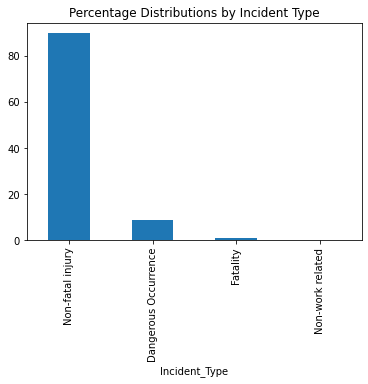

In [21]:
print('Percentage for default\n')
print(round(df.Incident_Type.value_counts(normalize=True)*100,2))
round(df.Incident_Type.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by Incident Type')
plt.show()

In [22]:
df.columns

Index(['Age', 'Gender', 'Sector', 'Incident_Type', 'Employment Status', 'Year',
       'County', 'Trigger'],
      dtype='object')

In [23]:
#Removing columns
df1 = df.drop(columns = ['Sector', 'County', 'Employment Status'], axis=1)

In [24]:
df1.head()

,Age,Gender,Incident_Type,Year,Trigger
0,0-17 Years,Male,Non-fatal injury,2017,"Lifting, carrying"
6,0-17 Years,Male,Non-fatal injury,2017,Fall from height
19,0-17 Years,Male,Non-fatal injury,2019,Other triggers not listed
26,0-17 Years,Male,Non-fatal injury,2019,"Lifting, carrying"
27,0-17 Years,Male,Non-fatal injury,2019,Loss of control of machine


In [25]:
df['Incident_Type'].value_counts().sort_index()

Incident_Type
Dangerous Occurrence     382
Fatality                  48
Non-fatal injury        3901
Non-work related           8
Name: count, dtype: int64

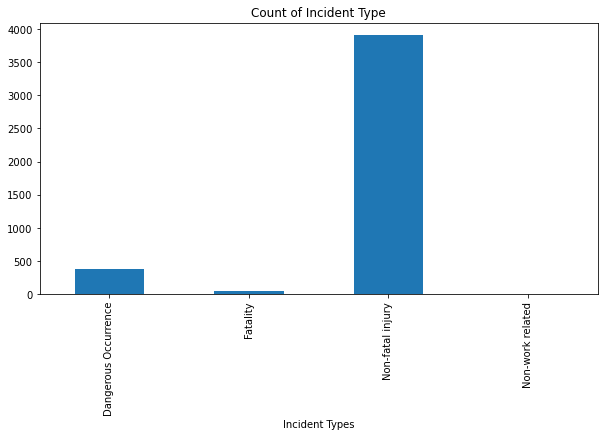

In [26]:
it = df['Incident_Type'].value_counts().sort_index() \
    .plot(kind='bar',
          title = 'Count of Incident Type',
          figsize = (10,5))
it.set_xlabel('Incident Types')
plt.show()

In [27]:
# Apply first level cleaning
import re
import string

trigger = 'text'

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [28]:
df1['Trigger1'] = pd.DataFrame(df1.Trigger.apply(cleaned1))
df1.head(10)

,Age,Gender,Incident_Type,Year,Trigger,Trigger1
0,0-17 Years,Male,Non-fatal injury,2017,"Lifting, carrying",lifting carrying
6,0-17 Years,Male,Non-fatal injury,2017,Fall from height,fall from height
19,0-17 Years,Male,Non-fatal injury,2019,Other triggers not listed,other triggers not listed
26,0-17 Years,Male,Non-fatal injury,2019,"Lifting, carrying",lifting carrying
27,0-17 Years,Male,Non-fatal injury,2019,Loss of control of machine,loss of control of machine
31,0-17 Years,Male,Non-fatal injury,2019,"Fall on same level (slip, stumble etc)",fall on same level slip stumble etc
33,0-17 Years,Male,Non-fatal injury,2019,"Fall on same level (slip, stumble etc)",fall on same level slip stumble etc
36,0-17 Years,Male,Non-fatal injury,2020,Loss of control of hand held tool,loss of control of hand held tool
37,0-17 Years,Male,Non-fatal injury,2020,Fall from height,fall from height
40,0-17 Years,Male,Non-fatal injury,2020,"Lifting, carrying",lifting carrying


In [29]:
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [30]:
df1['cleaned_Trigger1'] = pd.DataFrame(df1['Trigger1'].apply(cleaned2))
df1.head()

,Age,Gender,Incident_Type,Year,Trigger,Trigger1,cleaned_Trigger1
0,0-17 Years,Male,Non-fatal injury,2017,"Lifting, carrying",lifting carrying,lifting carrying
6,0-17 Years,Male,Non-fatal injury,2017,Fall from height,fall from height,fall from height
19,0-17 Years,Male,Non-fatal injury,2019,Other triggers not listed,other triggers not listed,other triggers not listed
26,0-17 Years,Male,Non-fatal injury,2019,"Lifting, carrying",lifting carrying,lifting carrying
27,0-17 Years,Male,Non-fatal injury,2019,Loss of control of machine,loss of control of machine,loss of control of machine


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 0 to 45783
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               4339 non-null   object
 1   Gender            4339 non-null   object
 2   Incident_Type     4339 non-null   object
 3   Year              4339 non-null   int64 
 4   Trigger           4339 non-null   object
 5   Trigger1          4339 non-null   object
 6   cleaned_Trigger1  4339 non-null   object
dtypes: int64(1), object(6)
memory usage: 271.2+ KB


In [32]:
df1['cleaned_Trigger1'] = df1['cleaned_Trigger1'].astype(str)

In [33]:
tokenizer = df1['cleaned_Trigger1']
print(tokenizer)

0                      lifting carrying
6                      fall from height
19            other triggers not listed
26                     lifting carrying
27           loss of control of machine
                      ...              
45761    breakage of material at joints
45775          accident trigger unknown
45781                  fall from height
45782                  fall from height
45783          accident trigger unknown
Name: cleaned_Trigger1, Length: 4339, dtype: object


In [34]:
df1=df1.drop(["Age","Gender","Year","Trigger", "Trigger1"], axis=1)

In [35]:
df1.head()

,Incident_Type,cleaned_Trigger1
0,Non-fatal injury,lifting carrying
6,Non-fatal injury,fall from height
19,Non-fatal injury,other triggers not listed
26,Non-fatal injury,lifting carrying
27,Non-fatal injury,loss of control of machine


In [36]:
## Feature engineering

In [37]:
df1["Incident_Type"].unique()

array(['Non-fatal injury', 'Fatality', 'Non-work related',
       'Dangerous Occurrence'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
label_encoder = LabelEncoder()

In [40]:
df1['Incident_Type'] = label_encoder.fit_transform(df1['Incident_Type'])

In [41]:
df1['Incident_Type'].unique()

array([2, 1, 3, 0])

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 0 to 45783
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Incident_Type     4339 non-null   int32 
 1   cleaned_Trigger1  4339 non-null   object
dtypes: int32(1), object(1)
memory usage: 84.7+ KB


In [43]:
## 2: Non Fatal injury
## 0: Dangeros Occurrence
## 1: Fatality
## 3: Non-work related

In [44]:
df1['Incident_Type'].value_counts() 

Incident_Type
2    3901
0     382
1      48
3       8
Name: count, dtype: int64

## Sentiment analysis using TfidfVectorizer

In [45]:
from sklearn.model_selection import train_test_split

Independent_var = df1.cleaned_Trigger1
Dependent_var = df1.Incident_Type

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.20, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 3471
IV_test  : 868
DV_train : 3471
DV_test  : 868


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [47]:
## Create TfidfVectorizer and LogisticRegression objects
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

In [48]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[  3,   0,   2,   0],
       [  0,   0,   0,   0],
       [ 74,  14, 774,   1],
       [  0,   0,   0,   0]], dtype=int64)

In [49]:
print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8951612903225806
Precision :  0.9919015880076976
Recall :  0.8951612903225806


In [50]:
df1.shape

(4339, 2)

In [51]:
df1.duplicated().sum()

4268

In [52]:
example = ["accident trigger unknown"]
result = model.predict(example)
print(result)

[2]


## VADER Sentiment Scoring

In [53]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [54]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
    text = row['cleaned_Trigger1']
    myid = row['Incident_Type']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/4339 [00:00<?, ?it/s]

In [55]:
vaders = pd.DataFrame(res).T ## reading polarity score as a dataframe 
vaders = vaders.reset_index().rename(columns={'index': 'Incident_Type'})
vaders = vaders.merge(df1, how='left') ## merging vaders dataframe with original dataframe

In [56]:
vaders.tail()

,Incident_Type,neg,neu,pos,compound,cleaned_Trigger1
4334,0,0.0,1.0,0.0,0.0,other triggers not listed
4335,0,0.0,1.0,0.0,0.0,overflow leakage emission of liquid
4336,0,0.0,1.0,0.0,0.0,loss of control of machine
4337,0,0.0,1.0,0.0,0.0,overflow leakage emission of gas
4338,0,0.0,1.0,0.0,0.0,breakage of material at joints


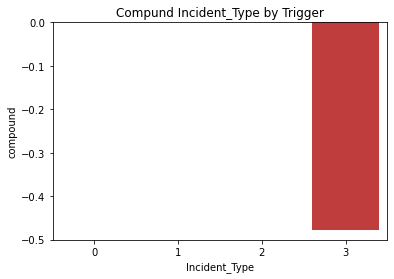

In [57]:
ax = sns.barplot(data=vaders, x='Incident_Type', y='compound')
ax.set_title('Compund Incident_Type by Trigger')
plt.show()

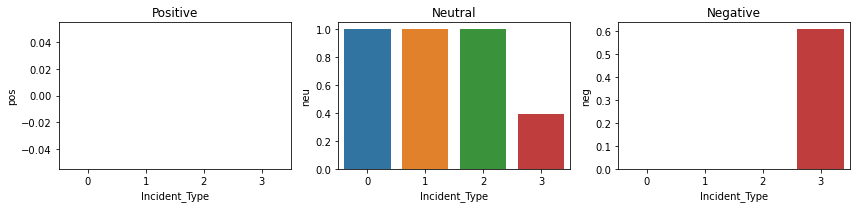

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Incident_Type', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Incident_Type', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Incident_Type', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()